In [1]:
import os
from keras.preprocessing import image
import cv2
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split as TTS
import pickle
haar=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
import random
from numpy.random import randint
import joblib

In [2]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping as ES
from tensorflow.keras.applications import VGG16,MobileNet 
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

## Load the Data that consist of Human Face

In [3]:
data=[]
categories=["Humans"]
for i in categories:
    path=os.path.join("Face_class",i)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        data.append(img)

## Detect Face from that Faces using Haarcascade_frontalface

In [4]:
data_Human=[]
for image in data:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    co_ord=haar.detectMultiScale(gray)
    for i,j,w,h in co_ord:
        if co_ord!=():
            image=image[j:j+h,i:i+w]
            image=cv2.resize(image,(224,224))
            data_Human.append(image)

C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_16796\2926082587.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():


## As some time it detect wrong Frame as Faces so we gonna run that above code again and label them as Class 0

In [5]:
data_Human_1=[]
for image in data_Human:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    co_ord=haar.detectMultiScale(gray)
    for i,j,w,h in co_ord:
        if co_ord!=():
            image=image[j:j+h,i:i+w]
            image=cv2.resize(image,(224,224))
            data_Human_1.append([image,0])

C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_16796\92595885.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():


## Capture images from webcam detect face,then crop and label them as class 1

In [5]:
cap=cv2.VideoCapture(0)
data_aryan=[]
while len(data_aryan)<800:
    ret,frame=cap.read()
    frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    co_ord=haar.detectMultiScale(frame1)
    max_co_ord=[]
    index_co_ord=None
    for i,j,w,h in co_ord:
        if co_ord!=():
            max_co_ord.append(abs((w+i)-i)+abs((h+j)-j))
    if co_ord!=() and max(max_co_ord)>160 :
        index_co_ord=max_co_ord.index(max(max_co_ord))
        x_=co_ord[index_co_ord][0]
        y_=co_ord[index_co_ord][1]
        w_=co_ord[index_co_ord][2]
        h_=co_ord[index_co_ord][3]
        cv2.rectangle(frame,(x_,y_),(x_+w_,y_+h_),(0,255,0),1)
        frame_1=frame[y_:h_+y_,x_:x_+w_]
        frame_1=cv2.resize(frame_1,(224,224))
        data_aryan.append([frame_1,1])
    cv2.putText(frame,str(len(data_aryan)),(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv2.LINE_AA)
    cv2.imshow("window",frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_6696\3623119091.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():
C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_6696\3623119091.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=() and max(max_co_ord)>160 :


## Store images from class 0 and class 1 in a list with their labels

In [7]:
data_Human_1.extend(data_aryan)

## Shuffle the Dataset to create randomness

In [8]:
random.shuffle(data_Human_1)
X=[]
Y=[]
for i,j in data_Human_1:
    X.append(i)
    Y.append(j)
x=np.array(X)
y=np.array(Y)

## Images from class 1 and 0

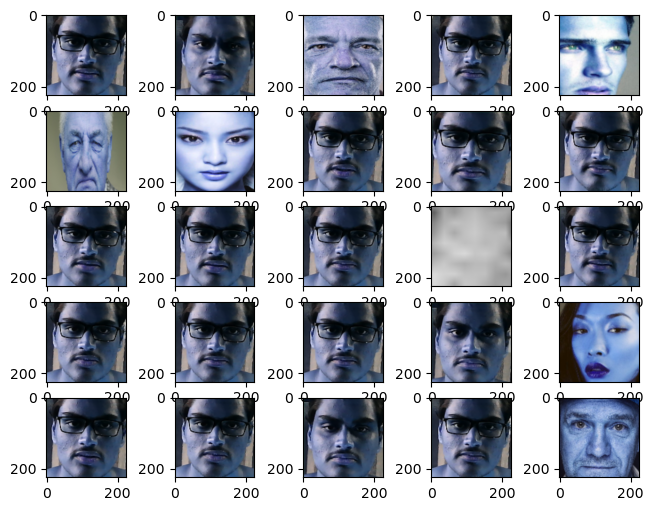

In [10]:
f,a=mp.subplots(5,5,figsize=(8,6))
c=0
for i in range(5):
    for j in range(5):
        c=random.randint(0,795)
        a[i][j].imshow(x[c,:,:,:])

## We gonna use transfer learning and the model we gonna use is MobileNet  and removing fully connected neural network

In [12]:
Mob=MobileNet(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
    
)
Mob.trainable=False

In [13]:
for i in Mob.layers:
    print(i.name,"=",i.trainable)

input_1 = False
conv1 = False
conv1_bn = False
conv1_relu = False
conv_dw_1 = False
conv_dw_1_bn = False
conv_dw_1_relu = False
conv_pw_1 = False
conv_pw_1_bn = False
conv_pw_1_relu = False
conv_pad_2 = False
conv_dw_2 = False
conv_dw_2_bn = False
conv_dw_2_relu = False
conv_pw_2 = False
conv_pw_2_bn = False
conv_pw_2_relu = False
conv_dw_3 = False
conv_dw_3_bn = False
conv_dw_3_relu = False
conv_pw_3 = False
conv_pw_3_bn = False
conv_pw_3_relu = False
conv_pad_4 = False
conv_dw_4 = False
conv_dw_4_bn = False
conv_dw_4_relu = False
conv_pw_4 = False
conv_pw_4_bn = False
conv_pw_4_relu = False
conv_dw_5 = False
conv_dw_5_bn = False
conv_dw_5_relu = False
conv_pw_5 = False
conv_pw_5_bn = False
conv_pw_5_relu = False
conv_pad_6 = False
conv_dw_6 = False
conv_dw_6_bn = False
conv_dw_6_relu = False
conv_pw_6 = False
conv_pw_6_bn = False
conv_pw_6_relu = False
conv_dw_7 = False
conv_dw_7_bn = False
conv_dw_7_relu = False
conv_pw_7 = False
conv_pw_7_bn = False
conv_pw_7_relu = False
conv_dw_8

## Fine tuning this model by freezing all weights except all 13 layers

In [15]:
for i in Mob.layers:
    if "_13" in i.name:
        i.trainable=True

In [16]:
for i in Mob.layers:
    print(i.name,"=",i.trainable)

input_1 = False
conv1 = False
conv1_bn = False
conv1_relu = False
conv_dw_1 = False
conv_dw_1_bn = False
conv_dw_1_relu = False
conv_pw_1 = False
conv_pw_1_bn = False
conv_pw_1_relu = False
conv_pad_2 = False
conv_dw_2 = False
conv_dw_2_bn = False
conv_dw_2_relu = False
conv_pw_2 = False
conv_pw_2_bn = False
conv_pw_2_relu = False
conv_dw_3 = False
conv_dw_3_bn = False
conv_dw_3_relu = False
conv_pw_3 = False
conv_pw_3_bn = False
conv_pw_3_relu = False
conv_pad_4 = False
conv_dw_4 = False
conv_dw_4_bn = False
conv_dw_4_relu = False
conv_pw_4 = False
conv_pw_4_bn = False
conv_pw_4_relu = False
conv_dw_5 = False
conv_dw_5_bn = False
conv_dw_5_relu = False
conv_pw_5 = False
conv_pw_5_bn = False
conv_pw_5_relu = False
conv_pad_6 = False
conv_dw_6 = False
conv_dw_6_bn = False
conv_dw_6_relu = False
conv_pw_6 = False
conv_pw_6_bn = False
conv_pw_6_relu = False
conv_dw_7 = False
conv_dw_7_bn = False
conv_dw_7_relu = False
conv_pw_7 = False
conv_pw_7_bn = False
conv_pw_7_relu = False
conv_dw_8

In [17]:
Mob.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [18]:
model=Sequential()

model.add(Mob)

model.add(Flatten())

model.add(Dense(400,activation="relu"))

model.add(Dense(200,activation="relu"))

model.add(Dense(100,activation="relu"))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 400)               20070800  
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                        

## Early stopping in case model overfits

In [19]:
es=ES(monitor="val_loss",
    min_delta=0.00001,
    patience=4,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,)

In [20]:
model.compile(optimizer="adamax",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])

## Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data.

In [21]:
datagen = IDG(featurewise_center=True,brightness_range=(0.6, 1),fill_mode="constant",featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,validation_split=0.2)

In [22]:
v=datagen.flow(x, y, batch_size=32,subset='training')
vis=v.next()
visual=np.array(vis[0])

C:\Users\AryanBr0\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\AryanBr0\anaconda3\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


## Sample images from Data augmentation

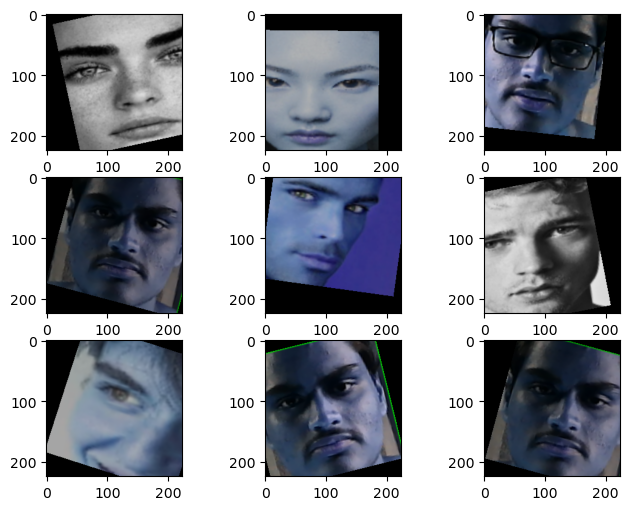

In [23]:
f,a=mp.subplots(3,3,figsize=(8,6))
c=0
for i in range(3):
    for j in range(3):
        c=c+i+j
        a[i][j].imshow(visual[c,:,:,:].astype('uint8'))

## Train the Model for 10 epoch

In [24]:
datagen.fit(x)
history=model.fit(datagen.flow(x, y, batch_size=8,subset='training'),steps_per_epoch=(len(x)*0.8)//8,validation_data=datagen.flow(x, y,batch_size=8, subset='validation'),validation_steps=(len(x)*0.2)//8,epochs=10,callbacks=es)

Epoch 1/10
149/149 [==============================] - 52s 340ms/step - loss: 0.3134 - accuracy: 0.9689 - val_loss: 0.0096 - val_accuracy: 0.9966
Epoch 2/10
149/149 [==============================] - 47s 315ms/step - loss: 0.0602 - accuracy: 0.9924 - val_loss: 9.5507e-06 - val_accuracy: 1.0000
Epoch 3/10
149/149 [==============================] - 47s 316ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0112 - val_accuracy: 0.9966
Epoch 4/10
149/149 [==============================] - 47s 314ms/step - loss: 2.2420e-04 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9966
Epoch 5/10
149/149 [==============================] - 47s 314ms/step - loss: 6.4934e-04 - accuracy: 1.0000 - val_loss: 1.3769e-05 - val_accuracy: 1.0000
Epoch 6/10
149/149 [==============================] - 47s 316ms/step - loss: 0.0104 - accuracy: 0.9983 - val_loss: 0.0602 - val_accuracy: 0.9966
Epoch 6: early stopping


In [3]:
#model.save('face_model')
#pickle.dump(datagen, open("face_norm.pkl", 'wb'))
model=keras.models.load_model('face_')
datagen=pickle.load(open("face_norm.pkl", 'rb'))

## Result of the model

In [4]:
cap=cv2.VideoCapture(0)
data_aryan=[]
while True:
    ret,frame=cap.read()
    frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    co_ord=haar.detectMultiScale(frame1)
    max_co_ord=[]
    index_co_ord=None
    for i,j,w,h in co_ord:
        if co_ord!=():
            max_co_ord.append(abs((w+i)-i)+abs((h+j)-j))
    if co_ord!=() and max(max_co_ord)>160:
        index_co_ord=max_co_ord.index(max(max_co_ord))
        x_=co_ord[index_co_ord][0]
        y_=co_ord[index_co_ord][1]
        w_=co_ord[index_co_ord][2]
        h_=co_ord[index_co_ord][3]
        frame_1=frame[y_:h_+y_,x_:x_+w_]
        frame_1=cv2.resize(frame_1,(224,224))
        frame_1=(frame_1-datagen.mean)/datagen.std
        if model.predict(frame_1.reshape(1,224,224,3))>0.5:
            cv2.rectangle(frame,(x_,y_),(x_+w_,y_+h_),(0,255,0),1)
            cv2.putText(frame,"UnLock",(x_,y_),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv2.LINE_AA)
        else:
            cv2.rectangle(frame,(x_,y_),(x_+w_,y_+h_),(0,0,255),1)
            cv2.putText(frame,"Lock",(x_,y_),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)
    else:
        cv2.putText(frame,"Face Not Found",(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2,cv2.LINE_AA)
    cv2.imshow("window",frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_6696\2737582956.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=():
C:\Users\AryanBr0\AppData\Local\Temp\ipykernel_6696\2737582956.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if co_ord!=() and max(max_co_ord)>160:


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 26ms/step


# Summary
#### Face recognition using Haar cascade and MobileNet as transfer learning with fine-tuning is a popular approach for accurately detecting and recognizing faces in images or videos. Haar cascade is a machine learning-based object detection technique that uses a set of pre-trained classifiers to identify specific objects or features within an image.

#### MobileNet, on the other hand, is a lightweight convolutional neural network architecture designed for efficient deployment on mobile and embedded devices. By leveraging transfer learning, we can take advantage of MobileNet's pre-trained weights, which have been trained on a large dataset, to expedite the training process.

#### To adapt MobileNet for face recognition, the pre-trained network is first modified by replacing the last fully connected layer with a new layer that corresponds to the number of individuals to be recognized. This new layer allows the network to output the probability scores for each individual. Fine-tuning involves training the modified MobileNet on a new dataset containing labeled face images.